# Introduction

This notebook helps to generate custom plots from TensorBoard logs

# Imports

In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# Classes and Functions

In [2]:
def running_mean(x, n):
    # res = []
    # for i in range(len(x)):
    #     res.append( sum(x[max(i-n+1, 0): i+1])   /   min(i+1, n) )
    return [sum(x[max(i-n+1, 0): i+1])   /   min(i+1, n) for i in range(len(x))]

In [3]:
class Series:
    def __init__(self, name):
        self.name = name
        self.x = []  # time steps
        self.y = []  # float values

In [4]:
def read_tb_log(logfile):
    """Read TensorBoard log into dictionary.
    
    Params:
        logfile (str): path to TB log file,
            e.g. 'tflogs/2/events.out.tfevents.1543017219.ip-172-31-16-179'
    
    Returns:
        dict: keys are series names, e.g. 'Metrics/Loss' or 'Episodic/Ep_Reward'
            values are type Series, which contain two lists of floats: 'x' and 'y'
    """
    
    data = {}
    
    summary_iterator = tf.train.summary_iterator(logfile)
    for i, event in enumerate(summary_iterator):

        for val in event.summary.value:
            
            # val.tag is e.g. 'Metrics/Loss', 'Metrics/Ep_Reward', etc.
            if val.tag not in data:
                series = Series(val.tag)
                data[val.tag] = series
            else:
                series = data[val.tag]

            series.x.append(event.step)
            series.y.append(val.simple_value)
            
    return data

# Process single log file

In [5]:
logfile = '/home/marcin/Dropbox/Courses/atari_2013/logs/pong/mine/2/events.out.tfevents.1543017219.ip-172-31-16-179'

In [6]:
data = read_tb_log(logfile)
display(list(data.keys()))

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


['Metrics/Epsilon',
 'Metrics/Loss',
 'Episodic/Ep_Reward',
 'Episodic/Ep_Length',
 'Episodic/StepsPerSec',
 'Test/Reward_Avg',
 'Test/Reward_Max',
 'Test/Q_Average']

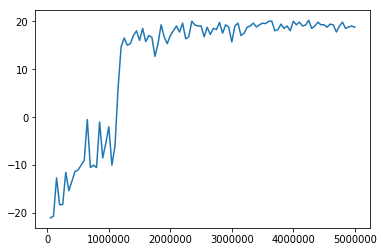

In [10]:
ss = data['Test/Reward_Avg']
plt.plot(ss.x, ss.y)
plt.show()

# Process multiple log files

In [46]:
def plot_logs(logfiles, baseline, game_name):
    for i, lf in enumerate(logfiles):
        data = read_tb_log(lf)
        ss = data['Test/Reward_Avg']
        #plt.plot(ss.x, ss.y, color='blue', alpha=0.1)
        plt.plot(ss.x, ss.y, label=f'This Notebook (run {i})')

    bsl = [baseline] * len(ss.x)
    plt.plot(ss.x, bsl, color='gray', alpha=0.5, linestyle=':', label='DeepMind (at 10M iter.)')

    plt.title(game_name)
    plt.xlabel('Iteration')
    plt.ylabel('Episode Reward\n(test time, avg.)')
    plt.legend()
    plt.show()

**Beam Rider**

In [52]:
logspath = '/home/marcin/Dropbox/Courses/atari_2013/logs/beam_rider/'

In [53]:
logfiles = glob.glob(os.path.join(logspath, '**', 'mine', '**', 'events.out.tfevents.*'), recursive=True)
logfiles = sorted(logfiles)
display(logfiles)

['/home/marcin/Dropbox/Courses/atari_2013/logs/beam_rider/mine/1/events.out.tfevents.1543106049.ip-172-31-16-179',
 '/home/marcin/Dropbox/Courses/atari_2013/logs/beam_rider/mine/2/events.out.tfevents.1543106331.ip-172-31-16-179']

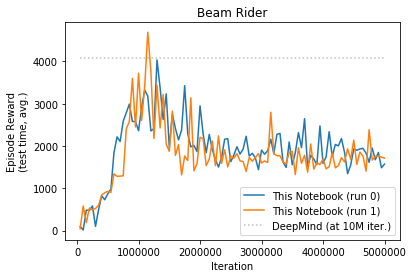

In [54]:
plot_logs(logfiles, baseline=4092, game_name='Beam Rider')

**Breakout**

In [55]:
logspath = '/home/marcin/Dropbox/Courses/atari_2013/logs/breakout/'

In [56]:
logfiles = glob.glob(os.path.join(logspath, '**', 'mine', '**', 'events.out.tfevents.*'), recursive=True)
logfiles = sorted(logfiles)
display(logfiles)

['/home/marcin/Dropbox/Courses/atari_2013/logs/breakout/mine/1/events.out.tfevents.1542825302.beast',
 '/home/marcin/Dropbox/Courses/atari_2013/logs/breakout/mine/2/events.out.tfevents.1542847172.ip-172-31-26-249']

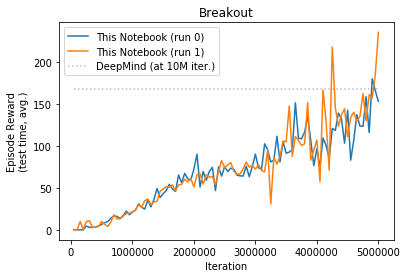

In [57]:
plot_logs(logfiles, baseline=168, game_name='Breakout')

**Enduro**

In [70]:
logspath = '/home/marcin/Dropbox/Courses/atari_2013/logs/enduro/'

In [71]:
logfiles = glob.glob(os.path.join(logspath, '**', 'mine', '**', 'events.out.tfevents.*'), recursive=True)
logfiles = sorted(logfiles)
display(logfiles)

['/home/marcin/Dropbox/Courses/atari_2013/logs/enduro/mine/1/events.out.tfevents.1543183726.ip-172-31-16-179',
 '/home/marcin/Dropbox/Courses/atari_2013/logs/enduro/mine/2/events.out.tfevents.1543183755.ip-172-31-16-179']

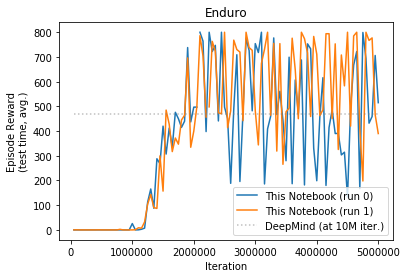

In [72]:
plot_logs(logfiles, baseline=470, game_name='Enduro')

**Pong**

In [58]:
logspath = '/home/marcin/Dropbox/Courses/atari_2013/logs/pong/'

In [59]:
logfiles = glob.glob(os.path.join(logspath, '**', 'mine', '**', 'events.out.tfevents.*'), recursive=True)
logfiles = sorted(logfiles)
display(logfiles)

['/home/marcin/Dropbox/Courses/atari_2013/logs/pong/mine/1/events.out.tfevents.1543017101.ip-172-31-16-179',
 '/home/marcin/Dropbox/Courses/atari_2013/logs/pong/mine/2/events.out.tfevents.1543017219.ip-172-31-16-179']

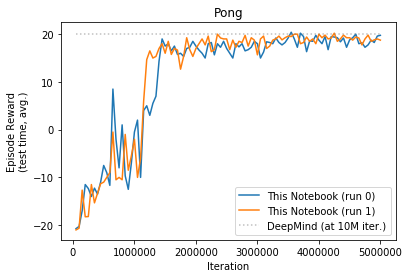

In [60]:
plot_logs(logfiles, baseline=20, game_name='Pong')

**Q-Bert**

In [61]:
logspath = '/home/marcin/Dropbox/Courses/atari_2013/logs/qbert/'

In [62]:
logfiles = glob.glob(os.path.join(logspath, '**', 'mine', '**', 'events.out.tfevents.*'), recursive=True)
logfiles = sorted(logfiles)
display(logfiles)

['/home/marcin/Dropbox/Courses/atari_2013/logs/qbert/mine/1/events.out.tfevents.1542846390.ip-172-31-26-249',
 '/home/marcin/Dropbox/Courses/atari_2013/logs/qbert/mine/2/events.out.tfevents.1542846568.ip-172-31-26-249']

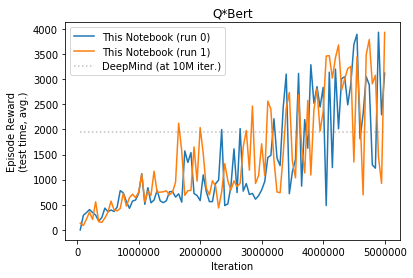

In [63]:
plot_logs(logfiles, baseline=1952, game_name='Q*Bert')

**Seaquest**

In [64]:
logspath = '/home/marcin/Dropbox/Courses/atari_2013/logs/seaquest/'

In [65]:
logfiles = glob.glob(os.path.join(logspath, '**', 'mine', '**', 'events.out.tfevents.*'), recursive=True)
logfiles = sorted(logfiles)
display(logfiles)

['/home/marcin/Dropbox/Courses/atari_2013/logs/seaquest/mine/1/events.out.tfevents.1543107300.ip-172-31-21-126',
 '/home/marcin/Dropbox/Courses/atari_2013/logs/seaquest/mine/2/events.out.tfevents.1543107504.ip-172-31-21-126']

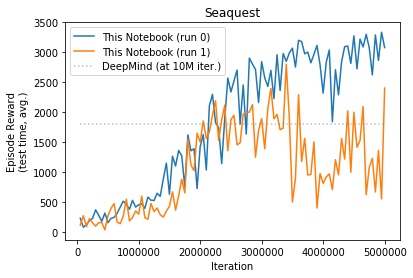

In [66]:
plot_logs(logfiles, baseline=1805, game_name='Seaquest')

**Space Invaders**

In [67]:
logspath = '/home/marcin/Dropbox/Courses/atari_2013/logs/space_invaders/'

In [68]:
logfiles = glob.glob(os.path.join(logspath, '**', 'mine', '**', 'events.out.tfevents.*'), recursive=True)
logfiles = sorted(logfiles)
display(logfiles)

['/home/marcin/Dropbox/Courses/atari_2013/logs/space_invaders/mine/1/events.out.tfevents.1543183475.ip-172-31-21-126',
 '/home/marcin/Dropbox/Courses/atari_2013/logs/space_invaders/mine/2/events.out.tfevents.1543183499.ip-172-31-21-126']

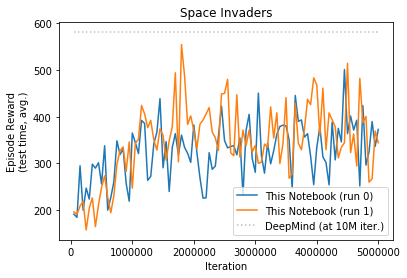

In [69]:
plot_logs(logfiles, baseline=581, game_name='Space Invaders')